In [39]:
import fiona
import rasterio
import rasterio.features
from rasterio import mask
import pandas as pd
import geopandas as gp
import numpy as np
import math
import ipympl
import matplotlib.pyplot as plt
import matplotlib as mlp
import scipy.ndimage as ndi
import re

%matplotlib inline

In [2]:
map_filename = "../../../../Covariates and Other Data/Geospatial Covariates/Malaria Atlas Project/map_pv_incidence_mean_1y_2017_00_00.tif"
map_raster = rasterio.open(map_filename)
map_raster.bounds

BoundingBox(left=-180.0, bottom=-89.99999999999281, right=179.99999999998562, top=90.0)

In [3]:
malap = map_raster.read(1)
malap.shape

(4320, 8640)

In [40]:
munis = gp.read_file("../../../../Covariates and Other Data/GIS/GT-IGN-cartografia_basica-Division politica Administrativa (Municipios).geojson")

In [53]:
munis_malap_masks = [mask.mask(map_raster, [muni["geometry"].__geo_interface__], crop=True) for i, muni in munis.iterrows()]

In [70]:
munis_malap_sums = [np.mean(mask[0].data[mask[0].data>0]) for mask in munis_malap_masks]

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [55]:
mlp.rcParams["figure.figsize"] = (10,5)
while True:
    key = input()
    if key == "q":
        break
    i = key
    print(munis[i]["properties"])
    plt.imshow(munis_malap_masks[i][0].data[0], cmap = current_cmap, vmin = 0)
    plt.colorbar()
    plt.show()
    

 q


In [71]:
munis["malap_sum"] = munis_malap_sums

C:\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


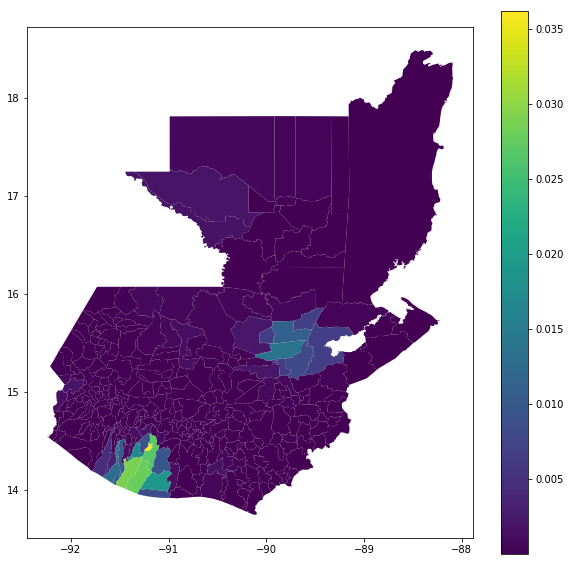

In [72]:
mlp.rcParams["figure.figsize"] = (10,10)
munis.plot("malap_sum", legend=True)

In [69]:
munis.malap_sum.sum()

7.045322187191898